In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('Data.csv')

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_6208\405780485.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('Data.csv')


In [3]:
data

,Unnamed: 0,GR,RD,RM,RT,Well,#Depth,DT
0,0,-999.250,-999.25,-999.25,-999.250,15_9-F-1 C,145.9,NaN
1,1,-999.250,-999.25,-999.25,-999.250,15_9-F-1 C,146.0,NaN
2,2,-999.250,-999.25,-999.25,-999.250,15_9-F-1 C,146.1,NaN
3,3,-999.250,-999.25,-999.25,-999.250,15_9-F-1 C,146.2,NaN
4,4,-999.250,-999.25,-999.25,-999.250,15_9-F-1 C,146.3,NaN
...,...,...,...,...,...,...,...,...
366949,22115,60.063,-999.25,NaN,2.125,15_9-F-5,NaN,-999.25
366950,22116,60.063,-999.25,NaN,2.125,15_9-F-5,NaN,-999.25
366951,22117,60.063,-999.25,NaN,2.125,15_9-F-5,NaN,-999.25
366952,22118,60.063,-999.25,NaN,2.125,15_9-F-5,NaN,-999.25


In [4]:
data = data[(data['#Depth'] >= 2400) & (data['#Depth'] <= 3500)]

In [5]:
data.Well.unique()

array(['15_9-F-11 A', '15_9-F-11 B', '15_9-F-11 T2', '15_9-F-12'],
      dtype=object)

In [6]:
data_ranges = {'GR': (0, 250),
               'NPHI': (0, 1),
               'RHOB': (1.4, 3),
               'DT': (40, 140),
               'RACEHM': (1.4, 3),
               'RACELM': (1.4, 3),
               'RPCEHM': (1.4, 3),
               'RPCELM': (1.4, 3),
                'CALI':(0,12) }

In [7]:
data_original = data.copy(deep= True)

In [8]:
data = data.drop('Unnamed: 0', axis= 1)

In [9]:
data= data.dropna()

In [10]:
data.Well.unique()

array(['15_9-F-11 A', '15_9-F-11 T2'], dtype=object)

In [11]:
data= data[data['DT']>40]

In [12]:
data['RM'] = data['RM'].astype(str).str.replace(" ", "")
data['RM'] = data['RM'].astype(float)

In [13]:
data.corr()

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_6208\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,GR,RD,RM,RT,#Depth,DT
GR,1.000000,-0.221979,0.000985,0.000985,-0.211366,0.383038
RD,-0.221979,1.000000,0.006393,0.006393,0.363949,-0.728384
RM,0.000985,0.006393,1.000000,1.000000,-0.008571,0.012896
RT,0.000985,0.006393,1.000000,1.000000,-0.008571,0.012896
#Depth,-0.211366,0.363949,-0.008571,-0.008571,1.000000,-0.602324
DT,0.383038,-0.728384,0.012896,0.012896,-0.602324,1.000000


In [14]:
data= data.drop('RM', axis= 1)

15_9-F-11 A
GR


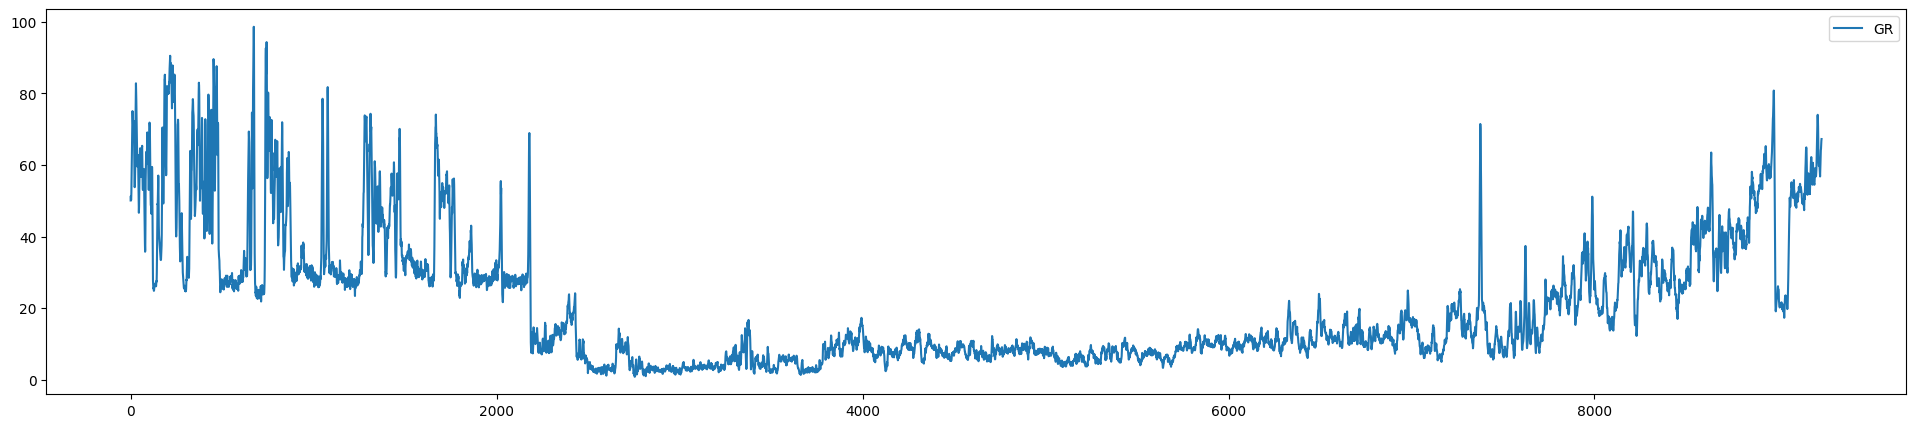

RD


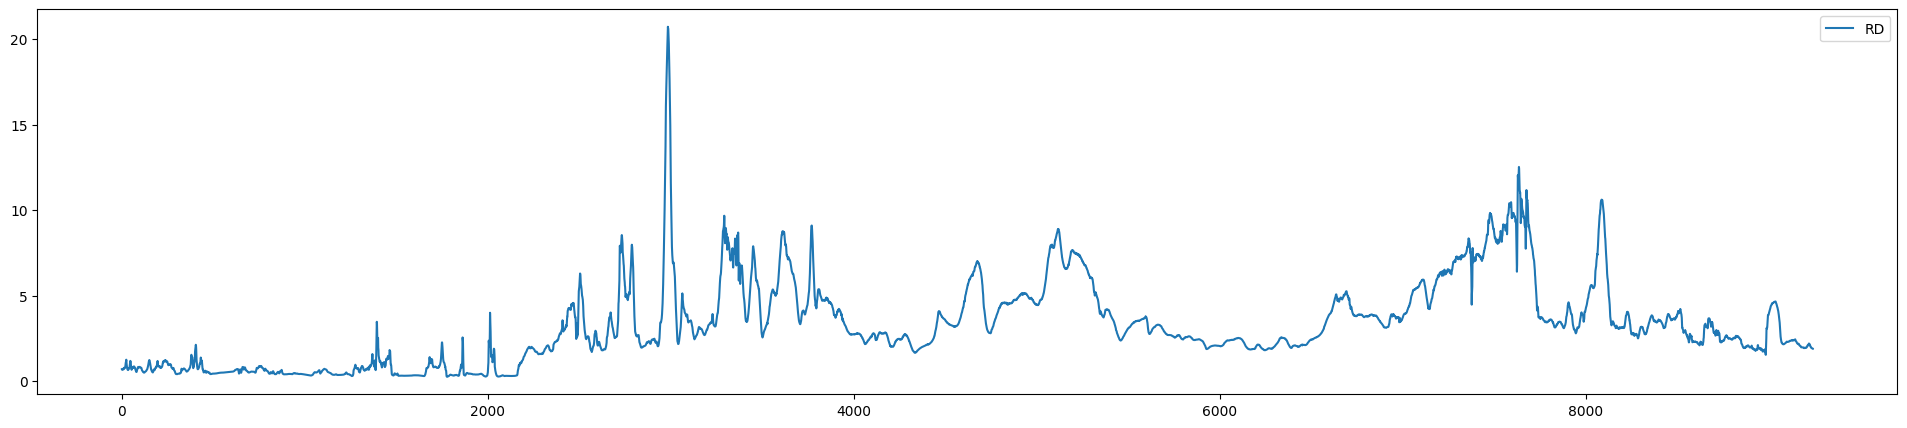

RT


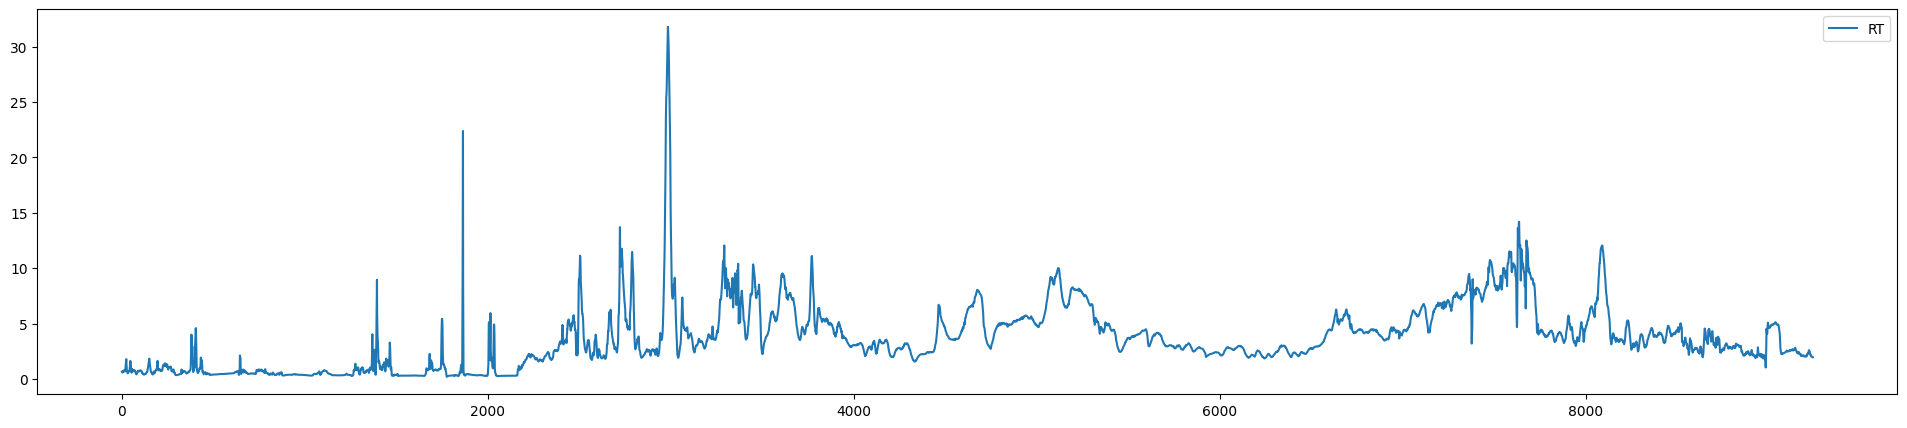

Well
#Depth


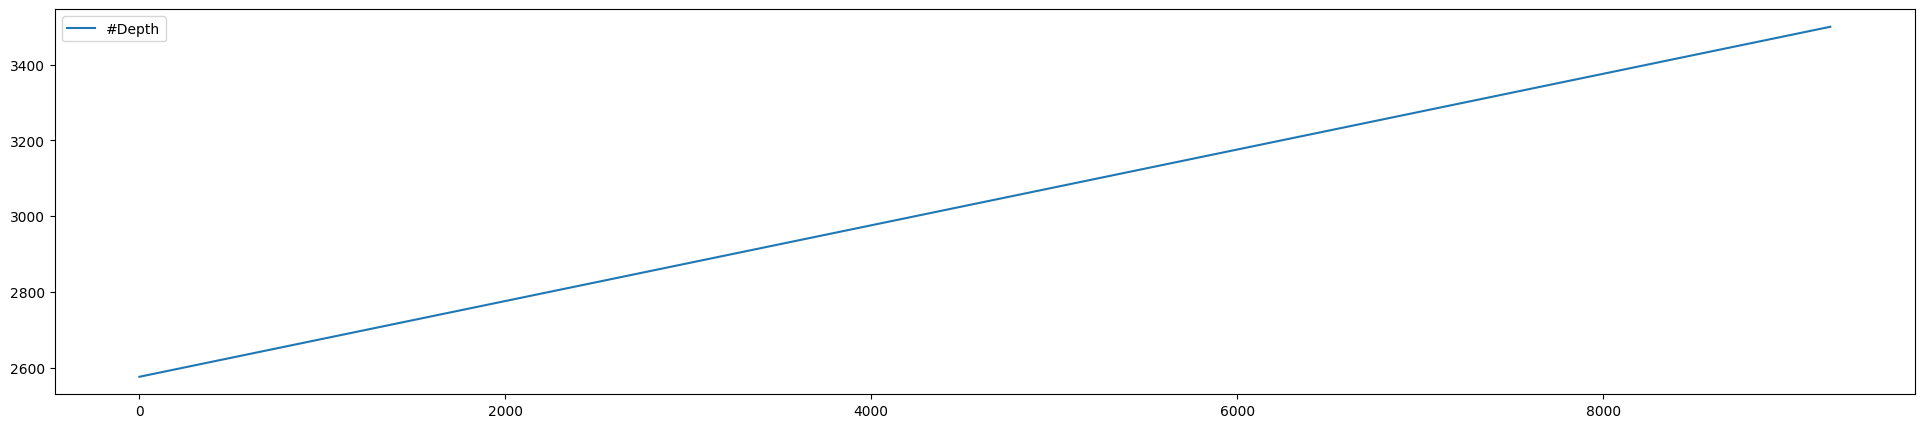

DT


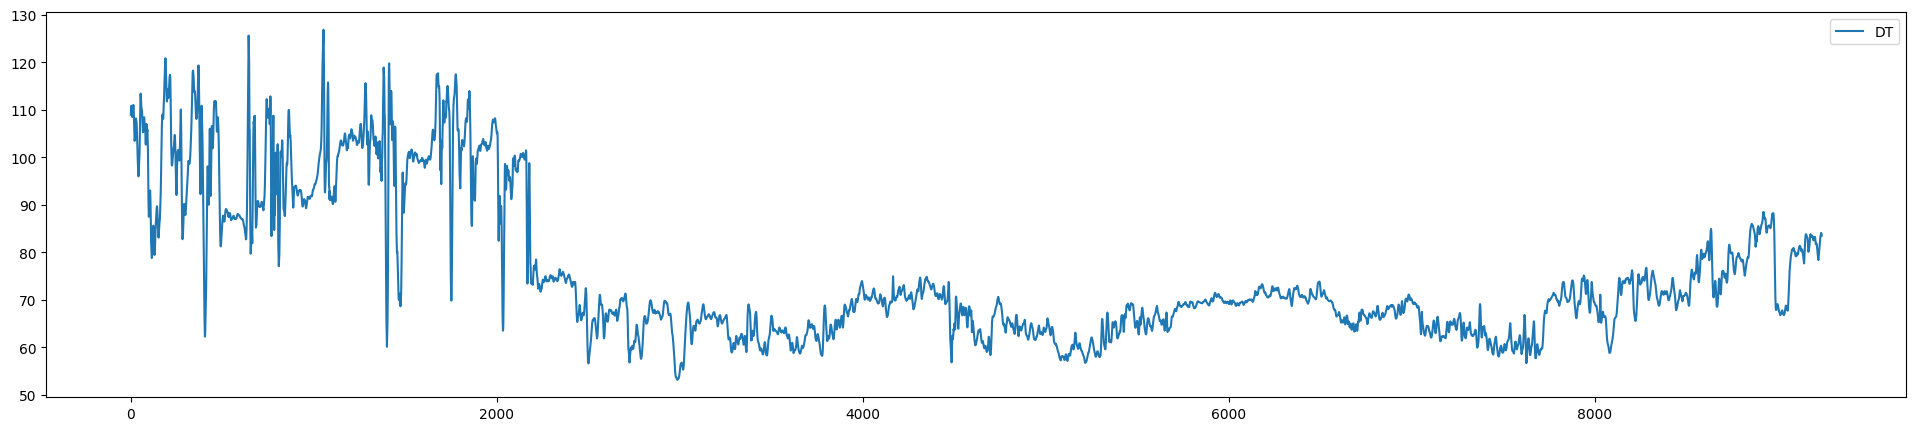

15_9-F-11 T2
GR


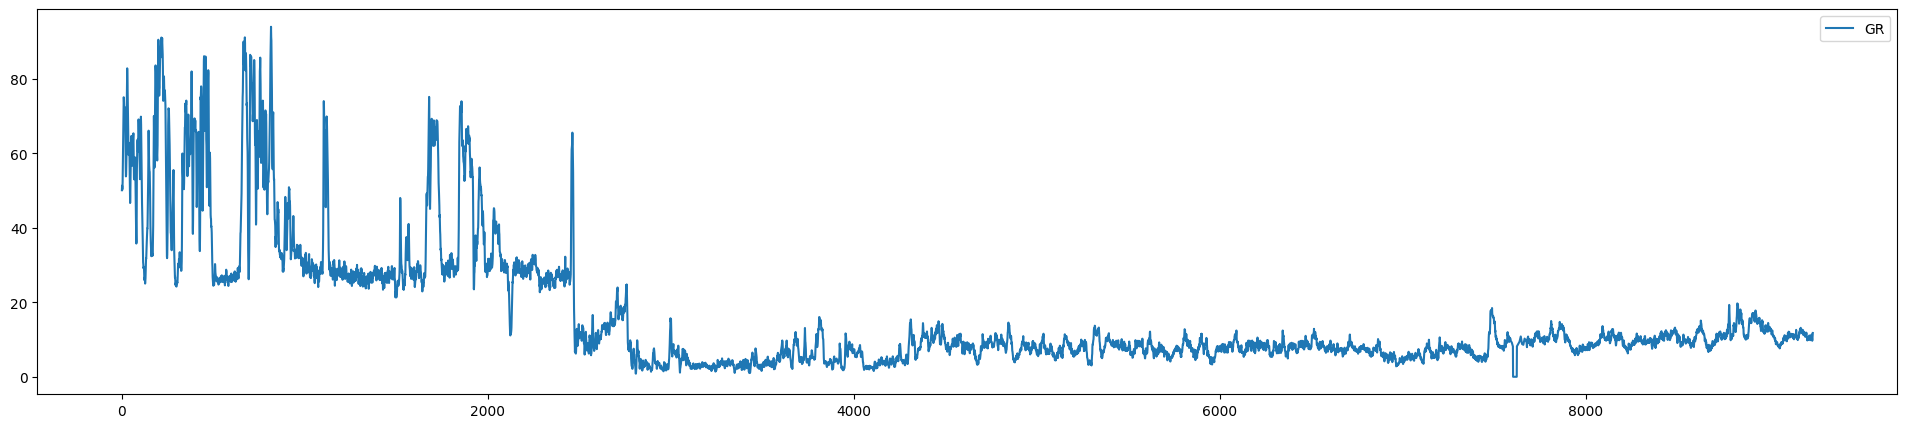

RD


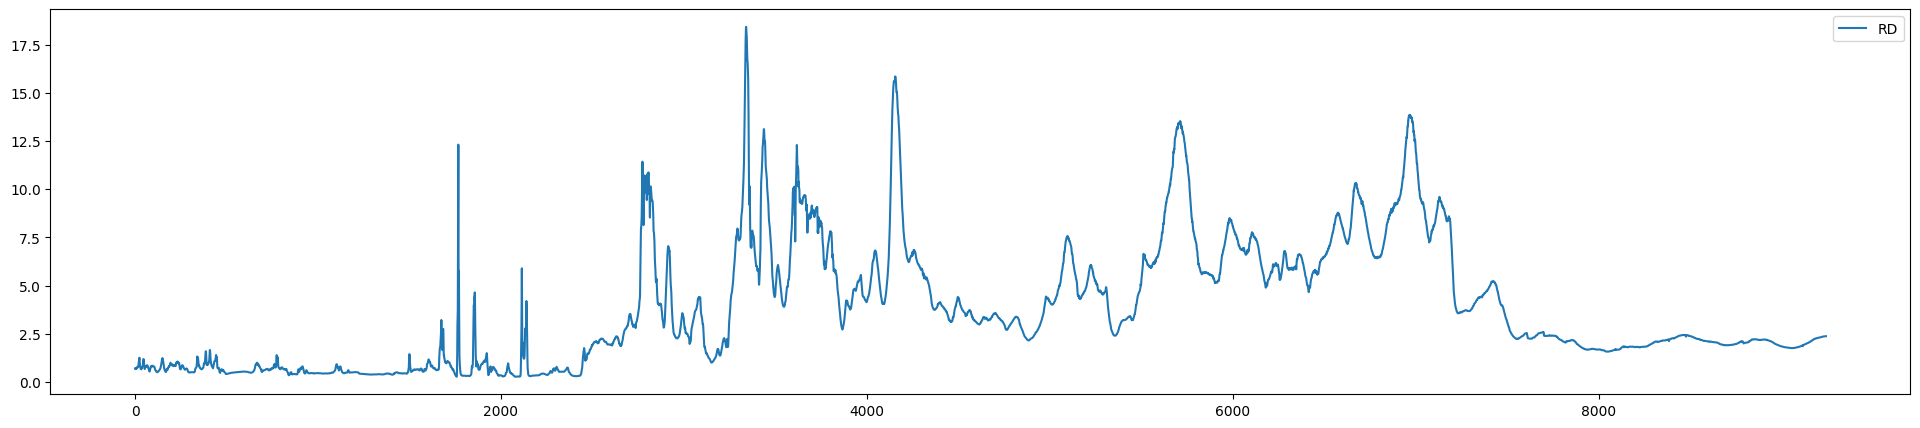

RT


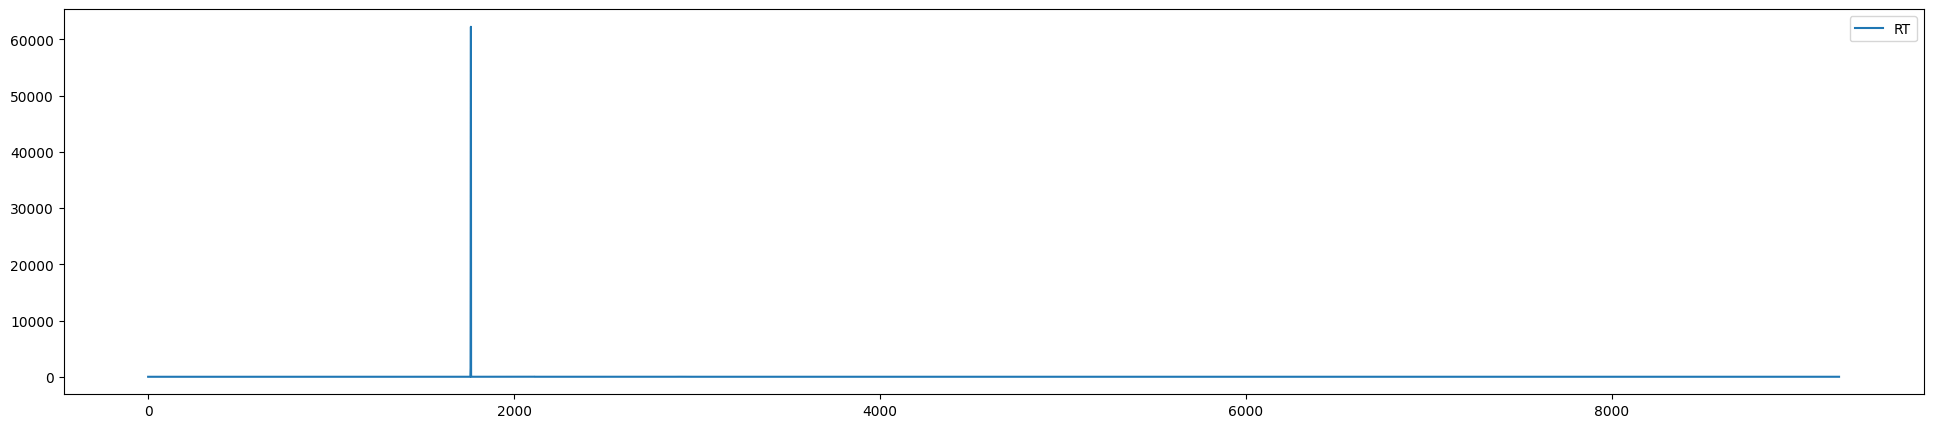

Well
#Depth


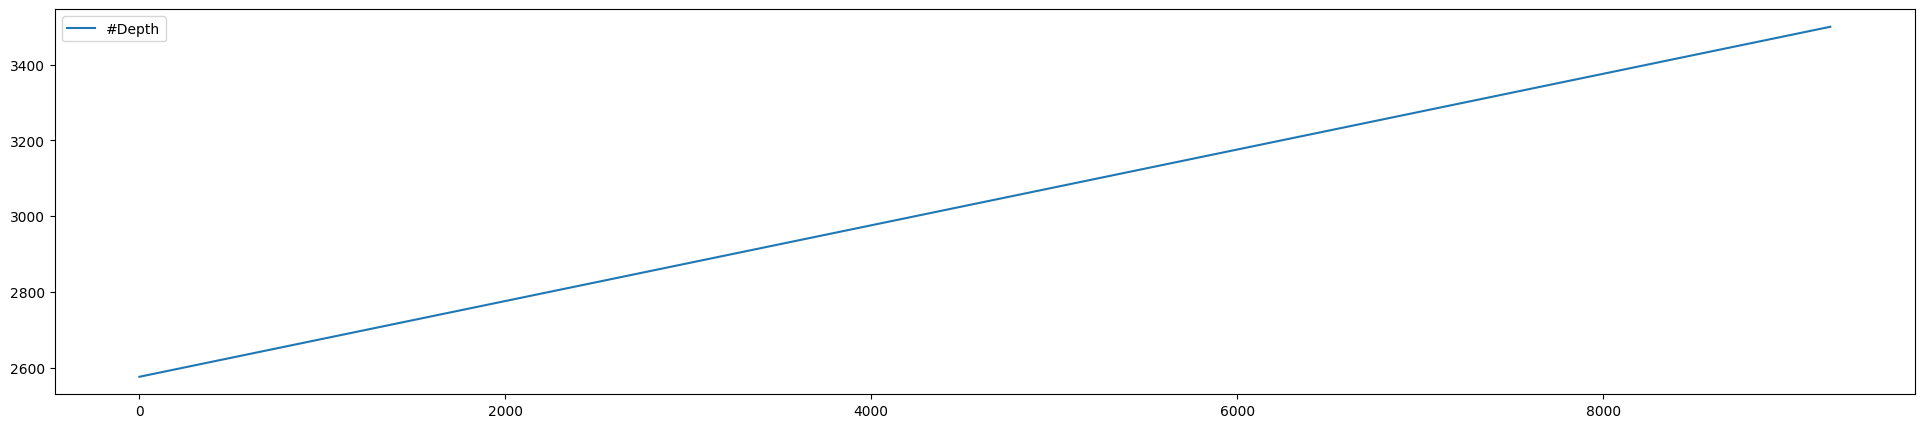

DT


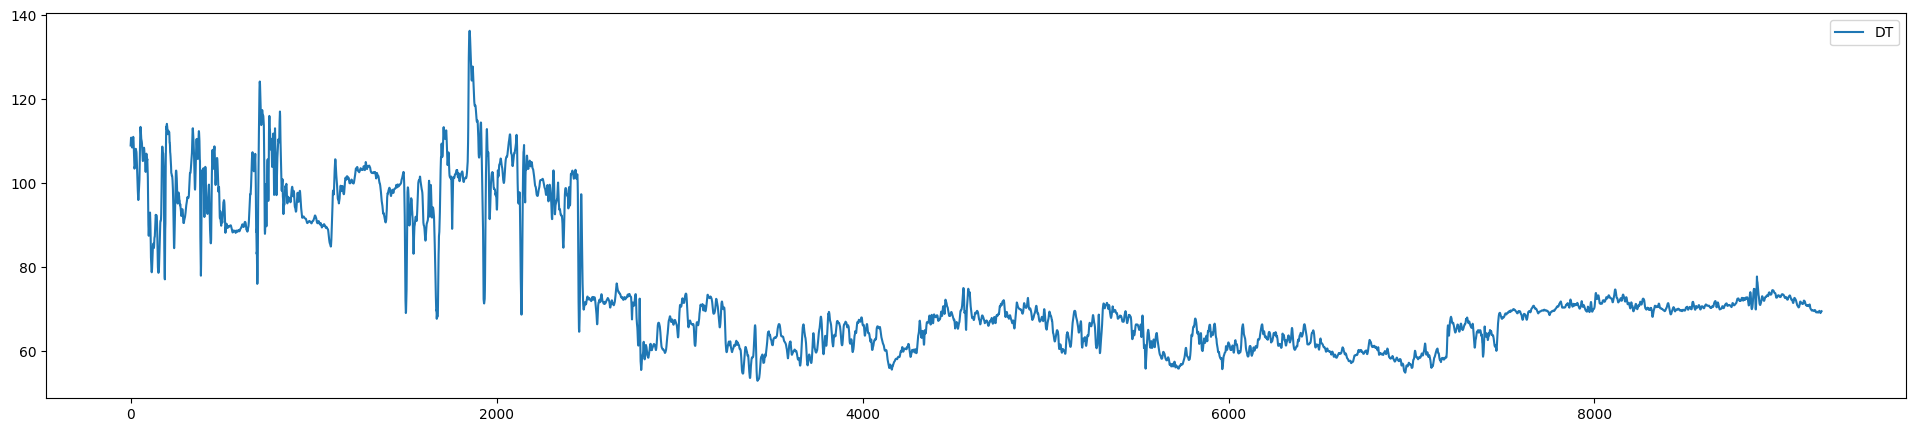

In [15]:
combined= pd.DataFrame()
for well in data.Well.unique():
    well_data= data[data['Well']==well]
    print(well)
    well_data= well_data.sort_values(by='#Depth', ascending= True).reset_index(drop= True)
    for i in well_data.columns:
        print(i)
        if i == 'Well':
            continue
        well_data[i] = well_data[i].astype(str).str.replace(" ", "")
        well_data[i] = well_data[i].astype(float)
        if i in data_ranges.keys():
            well_data[i] = well_data[i].clip(upper=data_ranges[i][1] , lower=data_ranges[i][0] )
        well_data[i+'_var'] = well_data[i].rolling(2).var()
        well_data.plot(y=i, figsize= (24, 5))
        plt.show()
    combined= pd.concat([combined, well_data])

### minor changes for RT

In [16]:
combined

,GR,RD,RT,Well,#Depth,DT,GR_var,RD_var,RT_var,#Depth_var,DT_var
0,50.109,0.701,0.665,15_9-F-11 A,2575.9,108.967,NaN,NaN,NaN,NaN,NaN
1,51.338,0.676,0.629,15_9-F-11 A,2576.0,110.147,0.755220,3.125000e-04,6.480000e-04,0.005,0.696200
2,50.333,0.663,0.606,15_9-F-11 A,2576.1,110.649,0.505012,8.450000e-05,2.645000e-04,0.005,0.126002
3,50.260,0.664,0.578,15_9-F-11 A,2576.2,110.829,0.002664,5.000000e-07,3.920000e-04,0.005,0.016200
4,52.324,0.668,0.591,15_9-F-11 A,2576.3,110.597,2.130048,8.000000e-06,8.450000e-05,0.005,0.026912
...,...,...,...,...,...,...,...,...,...,...,...
9237,10.195,2.363,2.727,15_9-F-11 T2,3499.6,69.227,0.130050,5.000005e-07,8.238418e-06,0.005,0.002965
9238,9.681,2.366,2.726,15_9-F-11 T2,3499.7,69.291,0.132098,4.500000e-06,7.384178e-07,0.005,0.002048
9239,10.089,2.368,2.730,15_9-F-11 T2,3499.8,69.390,0.083232,2.000000e-06,8.238418e-06,0.005,0.004901
9240,11.283,2.370,2.732,15_9-F-11 T2,3499.9,69.473,0.712818,2.000000e-06,2.238418e-06,0.005,0.003445


<Axes: >

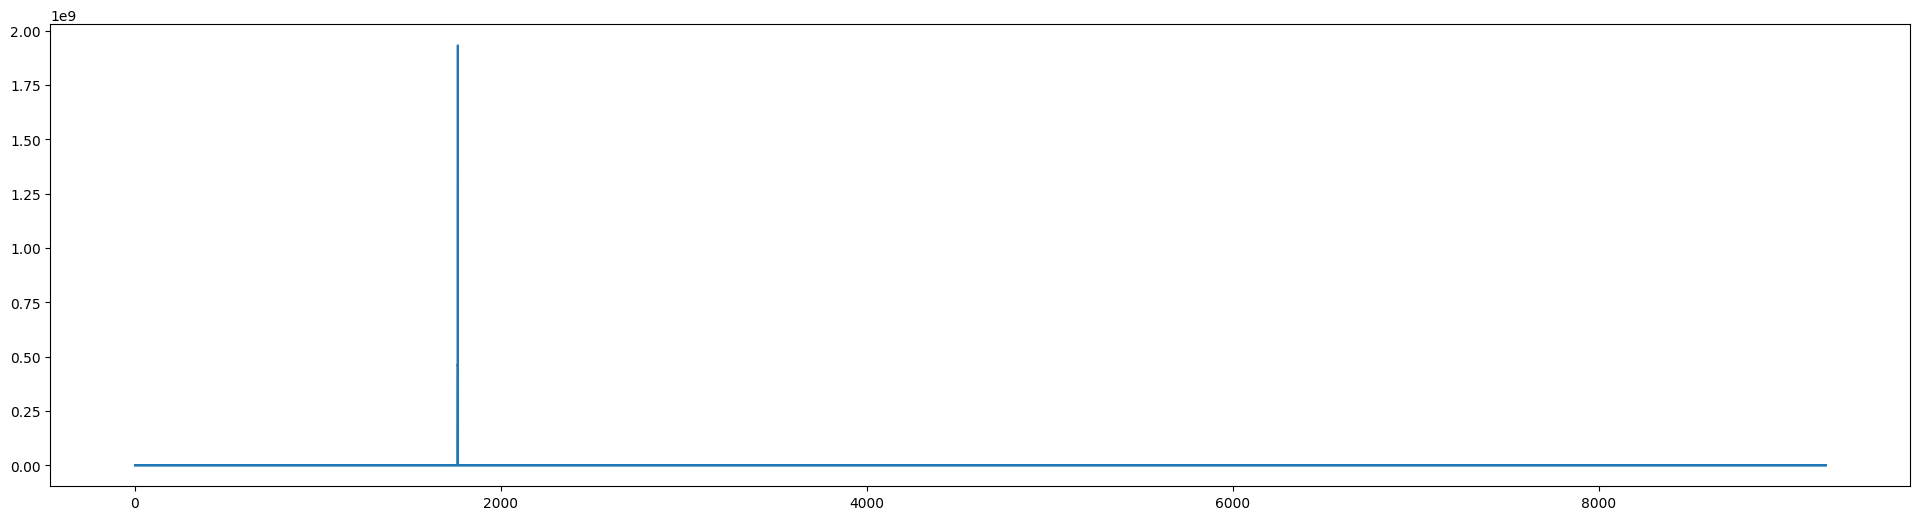

In [17]:
combined['RT_var'].plot(figsize= (24, 6))

<Axes: >

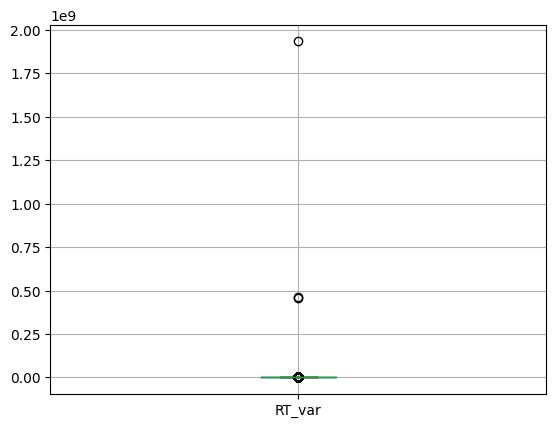

In [18]:
combined[['RT_var']].boxplot()

<Axes: >

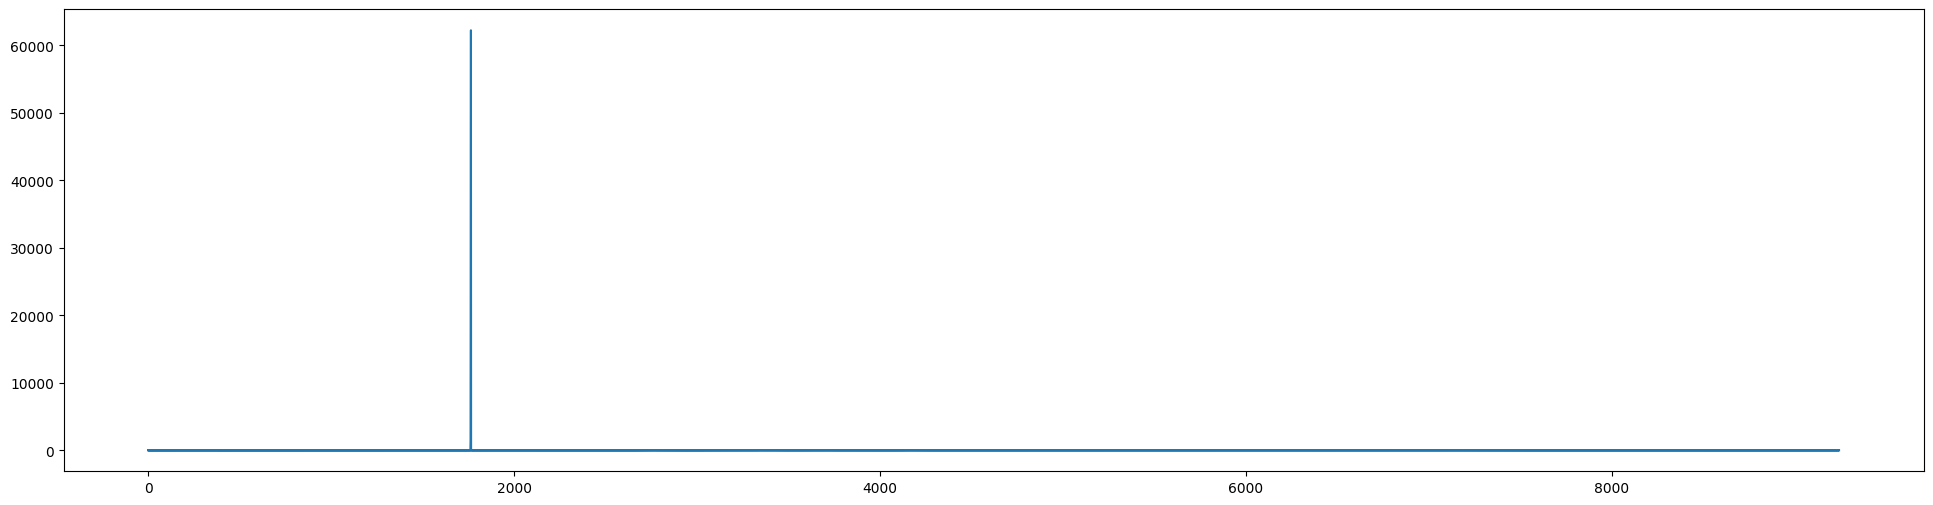

In [19]:
combined['RT'].plot(figsize= (24, 6))

In [20]:
combined['RT_var'] = combined['RT_var'].fillna(0)

In [21]:
combined = combined.drop(['GR_var', 'RD_var', '#Depth_var','DT_var'], axis= 1)

In [22]:
combined= combined.drop('#Depth', axis= 1)

In [23]:
combined.isna().sum()

GR        0
RD        0
RT        0
Well      0
DT        0
RT_var    0
dtype: int64

In [24]:
X= combined.drop(['DT', 'Well'], axis=1)
y= combined['DT']

In [25]:
x_train, x_test, y_train, y_test= train_test_split(X, y, shuffle=True, train_size= 0.98)

In [26]:
x_test

,GR,RD,RT,RT_var
5156,11.026,4.459,4.334,0.000648
2545,8.001,2.221,2.515,0.000242
3255,3.453,4.192,4.756,0.024421
6878,13.827,3.462,3.909,0.000145
7226,7.700,3.613,3.965,0.000613
...,...,...,...,...
1156,31.080,0.483,0.440,0.000050
4071,2.055,4.943,5.083,0.012325
4485,5.519,3.717,5.119,0.000221
8633,49.617,2.225,2.573,0.001625


In [27]:
model= XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
pred= model.predict(x_test)

In [29]:
results= pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [30]:
def evaluate(test, preds, process='Train'):
    score=r2_score(test,preds)
    mse = mean_squared_error(test,preds)
    rmse = np.sqrt(mean_squared_error(test,preds))
    mape = mean_absolute_percentage_error(test,preds)

    print('For {}'.format(process))
    print('r2_score: {}\nmse:{}\nrmse:{}\nmape:{}'.format(score, mse, rmse, mape))

    return score, mse, rmse, mape

In [31]:
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error  

In [32]:
evaluate(results['Actual'], results['Predicted'], process='')

For 
r2_score: 0.9389577487745983
mse:15.718262210584362
rmse:3.9646263645625375
mape:0.0252793965736473


(0.9389577487745983,
 15.718262210584362,
 3.9646263645625375,
 0.0252793965736473)

<Axes: >

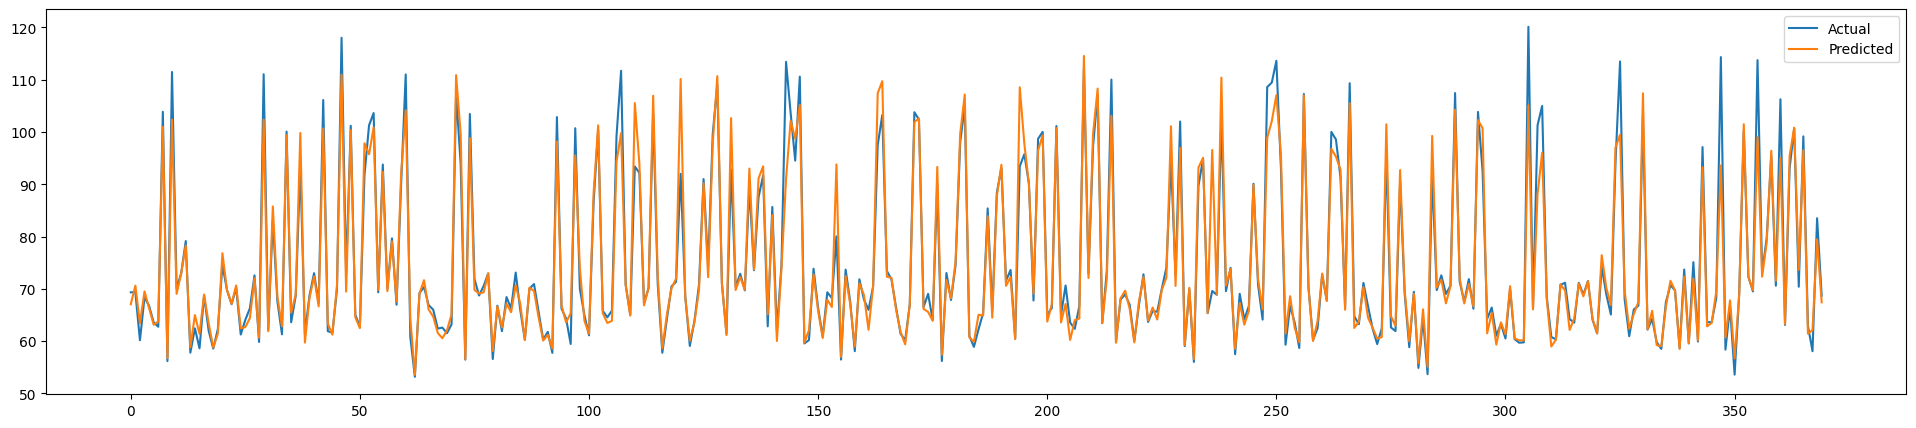

In [33]:
results.reset_index(drop=True).plot(figsize= (24, 5))

In [34]:
y_pred_train= model.predict(x_train)
evaluate(y_train, y_pred_train, process='')

For 
r2_score: 0.9798381016915888
mse:4.741306529040859
rmse:2.1774541393657088
mape:0.018057877855694956


(0.9798381016915888,
 4.741306529040859,
 2.1774541393657088,
 0.018057877855694956)

In [35]:
import optuna

In [36]:
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error  
from lightgbm import LGBMRegressor

import sklearn

def evaluate(test, preds, process='Train'):
    score=r2_score(test,preds)
    mse = mean_squared_error(test,preds)
    rmse = np.sqrt(mean_squared_error(test,preds))
    mape = mean_absolute_percentage_error(test,preds)

    print('For {}'.format(process))
    print('r2_score: {}\nmse:{}\nrmse:{}\nmape:{}'.format(score, mse, rmse, mape))

    return score, mse, rmse, mape



def optimize(feed, column):

    X= feed.drop([column], axis=1)
    y= feed[column]
    
    x_train, x_test, y_train, y_test= train_test_split(X, y, shuffle=True, train_size= 0.98)

    ################################################################################################################################## For density
    density_metrics = {}
    metrics_file= pd.DataFrame()
    iterator= 0


    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 100, 600)
        max_depth = trial.suggest_int('max_depth', 3, 9)
        reg_lambda = trial.suggest_loguniform('reg_lambda', 3, 9)
        eta = trial.suggest_discrete_uniform("eta", 0.1, 0.9, 0.1)
        alpha = trial.suggest_float("alpha", 0.0, 1.0)
        regressor = XGBRegressor(n_estimators = n_estimators, eta= eta, max_depth = max_depth, alpha = alpha, reg_lambda= reg_lambda)#min_child_weight = 2
        return np.absolute(sklearn.model_selection.cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3)).mean()
    # OPTUNA APPLICATION
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)
    trial = study.best_trial

    #XGBOOST
    regressor = XGBRegressor(n_estimators= trial.params['n_estimators'], eta= trial.params['eta'], max_depth= trial.params['max_depth'], alpha= trial.params['alpha']) 

    regressor.fit(x_train, y_train)
    y_pred_density = regressor.predict(x_test)

    results= pd.DataFrame({'Actual': y_test, 'Predictions': y_pred_density, 'Datetime': x_test.index})
    results.reset_index(drop=True).plot(y=['Actual', 'Predictions'], figsize=(30, 5))
    plt.show()


    score, mse, rmse, mape = evaluate(results['Actual'], results['Predictions'], 'test')
    density_metrics['XGBRegressor'] = {}
    density_metrics['XGBRegressor']['score'] = score
    density_metrics['XGBRegressor']['mse'] = mse
    density_metrics['XGBRegressor']['rmse'] = rmse
    density_metrics['XGBRegressor']['mape'] = mape
    density_metrics['XGBRegressor']['model'] = regressor

    metrics_file.loc[iterator, 'model'] = 'XGBRegressor'
    metrics_file.loc[iterator, 'score'] = score
    metrics_file.loc[iterator, 'mse'] = mse
    metrics_file.loc[iterator, 'rmse'] = rmse
    metrics_file.loc[iterator, 'mape'] = mape
    metrics_file.loc[iterator, 'target'] = 'Density'
    iterator += 1

    #Plotting feature importance
    feat_importances = pd.Series(regressor.feature_importances_, index=x_train.columns)
    feat_importances.nlargest(20).plot(kind='barh', figsize = (10,10))
    plt.show()

    return metrics_file, density_metrics, results, regressor
    

In [37]:
test_data= pd.read_csv('WLC_PETRO_COMPUTED_INPUT_1.csv')

C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_6208\1984687293.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data= pd.read_csv('WLC_PETRO_COMPUTED_INPUT_1.csv')


In [38]:
test_data

,#Depth,F01,ABDCQF02,ABDCQ,F03 ABDCQF04,BS,CALI,DRHO,DT,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,NaN,NaN,g/cm3,g/cm3,g/cm3,inches,inches,g/cm3,us/ft,API,...,b/elec,ohm.m,ohm.m,ohm.m,g/cm3,ohm.m,m/hr,ohm.m,ohm.m,ohm.m
1,145.9,-999.25,-999.25,-999.25,-999.25,36,-999.25,NaN,NaN,NaN,...,-999.25,-999.25,-999.25,-999.25,NaN,-999.25,-999.25,-999.25,-999.25,-999.25
2,146.0,-999.25,-999.25,-999.25,-999.25,36,-999.25,NaN,NaN,NaN,...,-999.25,-999.25,-999.25,-999.25,NaN,-999.25,-999.25,-999.25,-999.25,-999.25
3,146.1,-999.25,-999.25,-999.25,-999.25,36,-999.25,NaN,NaN,NaN,...,-999.25,-999.25,-999.25,-999.25,NaN,-999.25,-999.25,-999.25,-999.25,-999.25
4,146.2,-999.25,-999.25,-999.25,-999.25,36,-999.25,NaN,NaN,NaN,...,-999.25,-999.25,-999.25,-999.25,NaN,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34857,631.5,-999.25,-999.25,-999.25,-999.25,8.5,-999.25,-999.25,NaN,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,15.0631,-999.25,-999.25,-999.25
34858,631.6,-999.25,-999.25,-999.25,-999.25,8.5,-999.25,-999.25,NaN,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,15.0356,-999.25,-999.25,-999.25
34859,631.7,-999.25,-999.25,-999.25,-999.25,8.5,-999.25,-999.25,NaN,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,15.008,-999.25,-999.25,-999.25
34860,631.8,-999.25,-999.25,-999.25,-999.25,8.5,-999.25,-999.25,NaN,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,14.9805,-999.25,-999.25,-999.25


In [39]:
test_data= test_data[['DT','GR','RD','RT','#Depth']].dropna().reset_index(drop= True)

In [40]:
test_data = test_data.astype(float)

<Axes: >

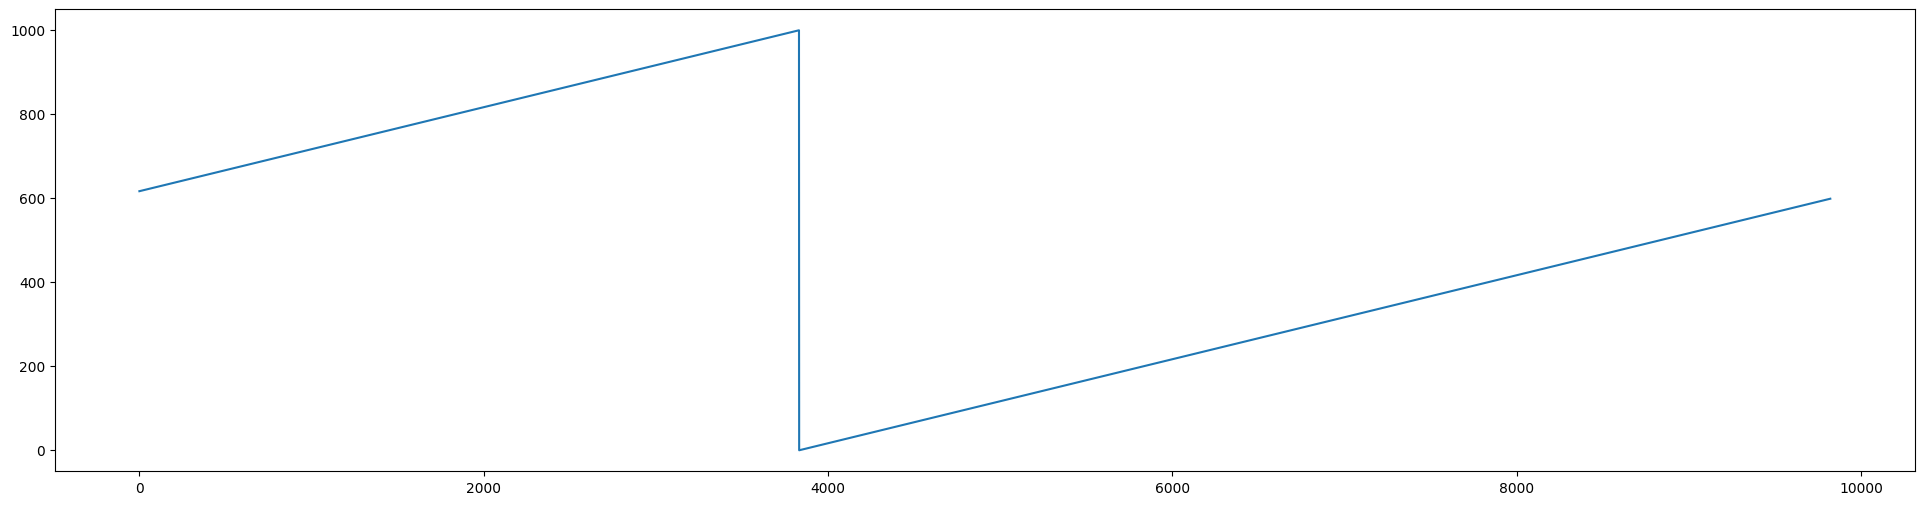

In [41]:
test_data['#Depth'].plot(figsize= (24, 6))

### The depth is different here than in the train set: Data drift. We need to remove depth as a feature

In [42]:
test_data= test_data.sort_values(by= '#Depth', ascending= True)
test_data['RT_var'] = test_data['RT'].rolling(2).var().fillna(0)


In [43]:
test_data= test_data.drop('#Depth', axis= 1)

In [44]:
data_ranges = {'GR': (0, 250),
               'NPHI': (0, 1),
               'RHOB': (1.4, 3),
               'DT': (40, 140),
               'RACEHM': (1.4, 3),
               'RACELM': (1.4, 3),
               'RPCEHM': (1.4, 3),
               'RPCELM': (1.4, 3),
                'CALI':(0,12) }

In [45]:
for i in test_data.columns:
    if i in data_ranges.keys():
        test_data[i]= test_data[i].clip(upper= data_ranges[i][1], lower= data_ranges[i][0])

In [46]:
test_data= test_data[test_data['DT']> 40]

In [47]:
test_data

,DT,GR,RD,RT,RT_var
3832,70.6617,13.1898,2.4804,2.4907,0.000000
3833,70.4687,14.4633,2.5160,2.5533,0.001959
3834,70.1785,16.6808,2.5160,2.5178,0.000630
3835,69.8049,18.6416,2.5282,2.5264,0.000037
3836,69.5522,18.9636,2.5604,2.5885,0.001928
...,...,...,...,...,...
3827,70.8417,9.0996,2.3710,2.3366,0.000099
3828,70.7965,10.3772,2.4113,2.3982,0.001897
3829,70.7867,11.5003,2.4425,2.4785,0.003224
3830,70.7363,11.7186,2.4686,2.4958,0.000150


GR


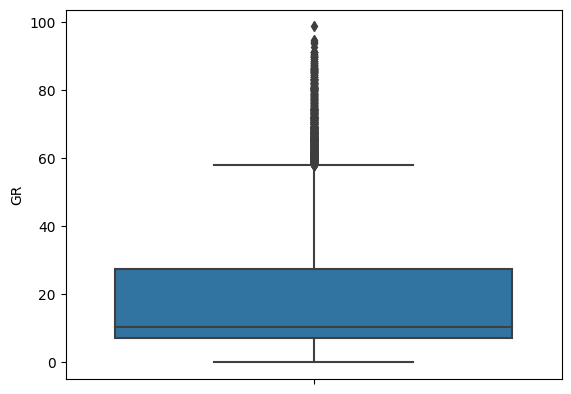

RD


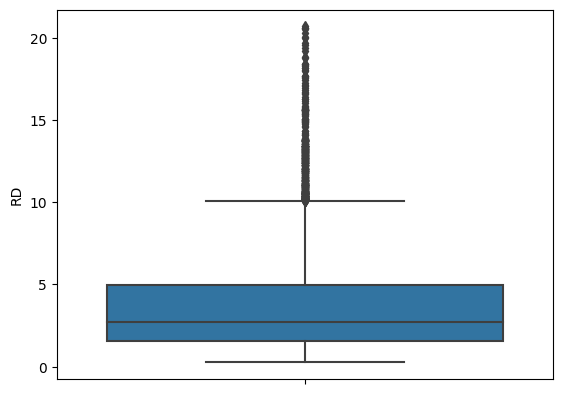

RT


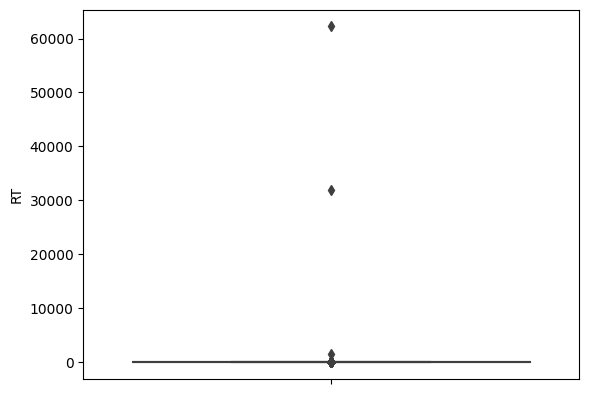

Well
DT


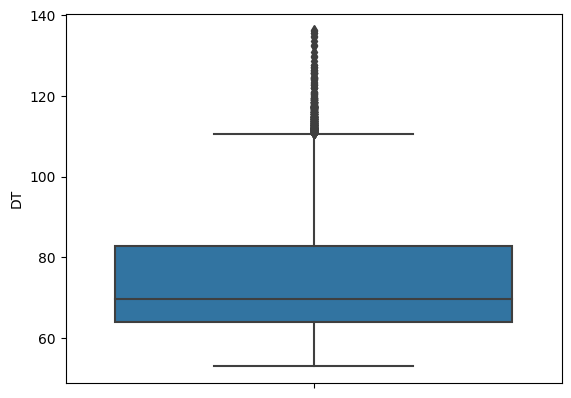

RT_var


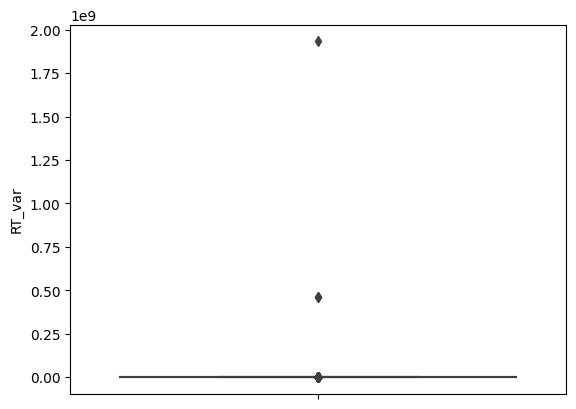

In [48]:
import seaborn as sns
for i in combined.columns:
    print(i)
    if i=='Well':
        continue
    sns.boxplot( y=i, data=combined)
    plt.show()

DT


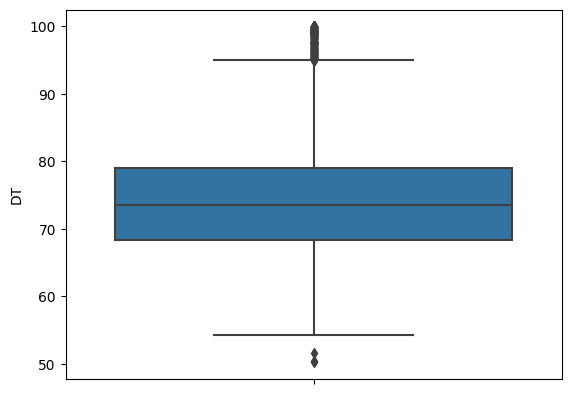

GR


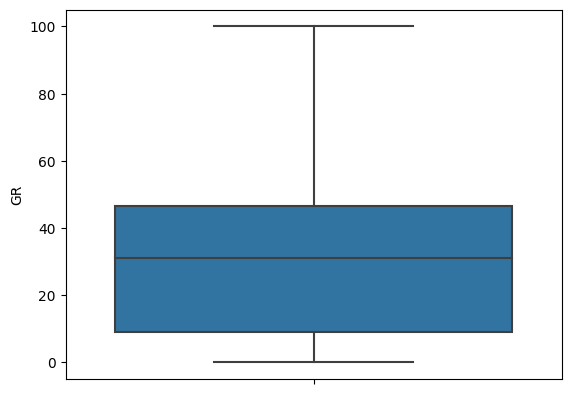

RD


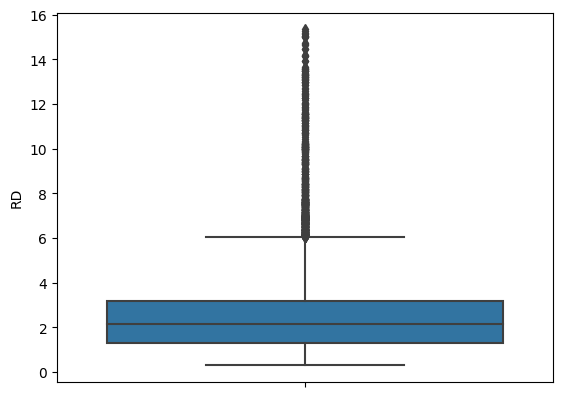

RT


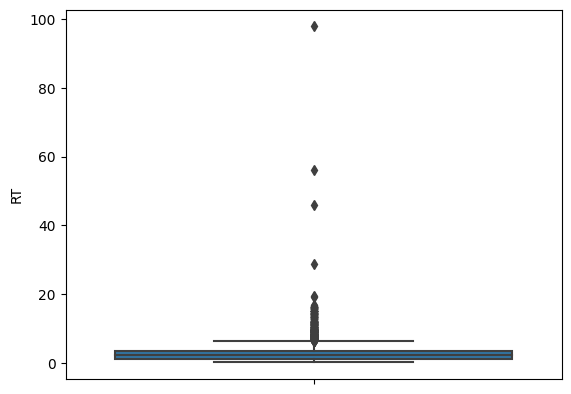

RT_var


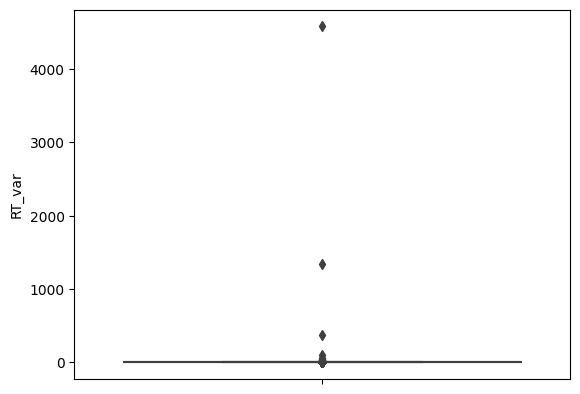

In [49]:
for i in test_data.columns:
    print(i)
    if i=='Well':
        continue
    sns.boxplot(y=i, data=test_data)
    plt.show()

In [50]:
test_data

,DT,GR,RD,RT,RT_var
3832,70.6617,13.1898,2.4804,2.4907,0.000000
3833,70.4687,14.4633,2.5160,2.5533,0.001959
3834,70.1785,16.6808,2.5160,2.5178,0.000630
3835,69.8049,18.6416,2.5282,2.5264,0.000037
3836,69.5522,18.9636,2.5604,2.5885,0.001928
...,...,...,...,...,...
3827,70.8417,9.0996,2.3710,2.3366,0.000099
3828,70.7965,10.3772,2.4113,2.3982,0.001897
3829,70.7867,11.5003,2.4425,2.4785,0.003224
3830,70.7363,11.7186,2.4686,2.4958,0.000150


In [51]:
oot_preds= model.predict(test_data.drop('DT', axis= 1))
oot_test= test_data['DT']

In [52]:
oot_results= pd.DataFrame({'Actual': test_data['DT'], 'Predictions': oot_preds}).reset_index()

<Axes: >

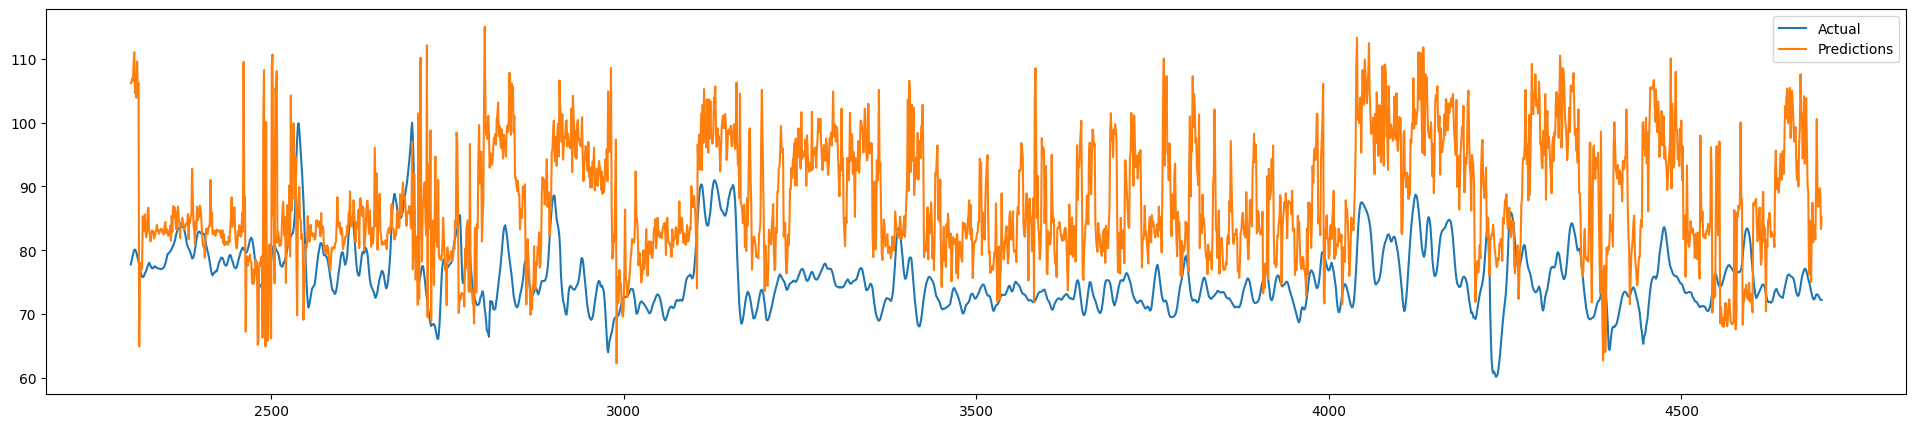

In [53]:
oot_results[(oot_results.inadex > 2300)& (oot_results.index < 4700)].plot(y=['Actual', 'Predictions'], figsize= (24, 5))

In [54]:
evaluate(oot_results['Actual'], oot_results['Predictions'], 'OOT')

For OOT
r2_score: -0.18868463469916064
mse:102.68367509163859
rmse:10.133295371775096
mape:0.08926714189894884


(-0.18868463469916064,
 102.68367509163859,
 10.133295371775096,
 0.08926714189894884)

In [55]:
oot_results

,index,Actual,Predictions
0,3832,70.6617,71.376900
1,3833,70.4687,73.253525
2,3834,70.1785,72.988319
3,3835,69.8049,72.870888
4,3836,69.5522,73.256416
...,...,...,...
9066,3827,70.8417,69.741257
9067,3828,70.7965,70.818710
9068,3829,70.7867,70.821831
9069,3830,70.7363,70.072639


<Axes: >

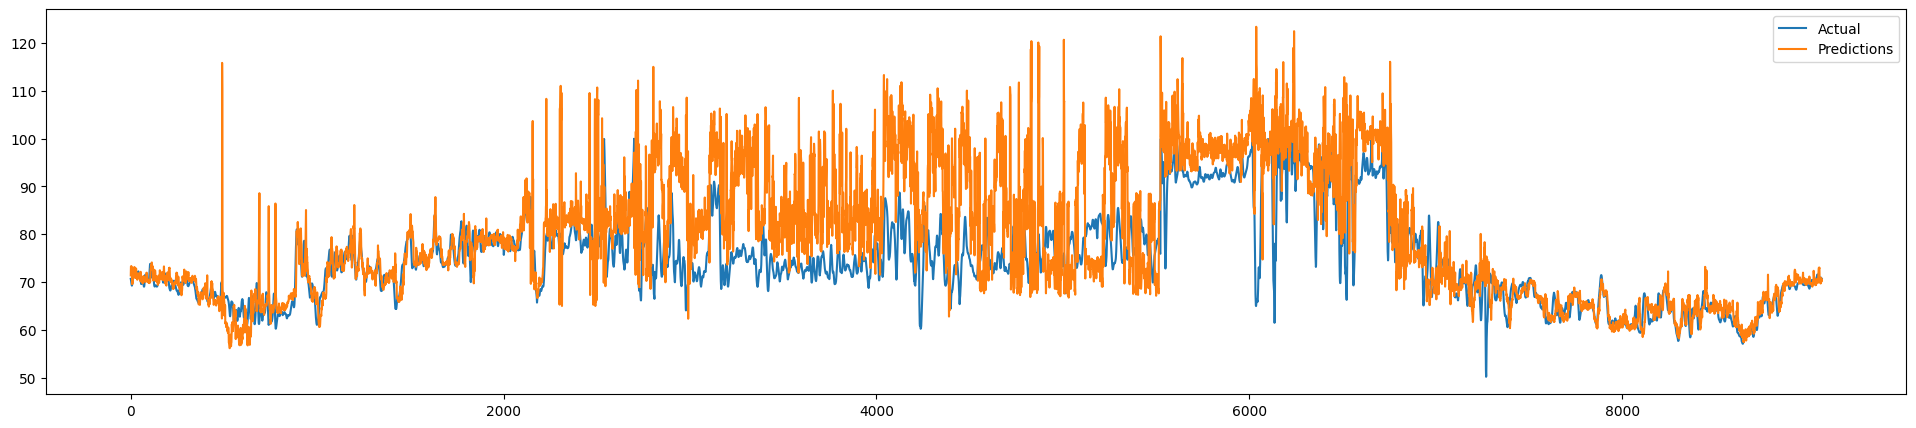

In [56]:
oot_results.plot(y=['Actual', 'Predictions'], figsize= (24, 5))

In [85]:
conversion_factors = { 
    'RT': 3.28084,   # m/hr to ft/hr
    'RT': 3.28084

}
for column, conversion_factor in conversion_factors.items():
    if column in data.columns:
        data[column] = data[column] * conversion_factor
print('UNITS IN AMERICAN SYSTEM')
display(data)

UNITS IN AMERICAN SYSTEM


,GR,RD,RT,Well,#Depth,DT
68026,50.109,0.701,23.484256,15_9-F-11 A,2575.9,108.967
68027,51.338,0.676,22.212928,15_9-F-11 A,2576.0,110.147
68028,50.333,0.663,21.400690,15_9-F-11 A,2576.1,110.649
68029,50.260,0.664,20.411879,15_9-F-11 A,2576.2,110.829
68030,52.324,0.668,20.870970,15_9-F-11 A,2576.3,110.597
...,...,...,...,...,...,...
158816,10.195,2.363,96.303105,15_9-F-11 T2,3499.6,69.227
158817,9.681,2.366,96.267791,15_9-F-11 T2,3499.7,69.291
158818,10.089,2.368,96.409049,15_9-F-11 T2,3499.8,69.390
158819,11.283,2.370,96.479679,15_9-F-11 T2,3499.9,69.473


# Hyperparameter tuning